In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from datetime import datetime

In [2]:
warnings.filterwarnings('ignore')

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
link1 = 'https://drive.google.com/file/d/1beF1Y034tqg9E8zwdbA0TalnoyOJ58LU/view?usp=sharing'
id = link1.split("/")[-2]
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Loan_status_2007-2020Q3.gzip') 

In [5]:
link2 = 'https://docs.google.com/spreadsheets/d/1BY8FdX-aepi2S9LKIUxHSfIQw7QGHrIl/edit?usp=sharing&ouid=104627117232377900032&rtpof=true&sd=true'
id = link2.split("/")[-2]
downloaded1 = drive.CreateFile({'id':id})
downloaded1.GetContentFile('LCDataDictionary.xlsx') 

In [6]:
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_colwidth', None)

# *1*. Read Dataset from csv file

In [7]:
#df = pd.read_csv('Loan_status_2007-2020Q3.gzip', compression='gzip', nrows=2925493, index_col=0,  low_memory=False)

In [8]:
start_time = datetime.now()
chunksize = int((10 ** 6) / 2)
print("Chunksize",chunksize)
df = pd.DataFrame()
with pd.read_csv('Loan_status_2007-2020Q3.gzip', compression='gzip',  index_col=0,  chunksize=chunksize,  low_memory=False) as reader:
    iteration = 0
    for chunk in reader:
        df = df.append(chunk)
        print("Iteration:",iteration)
        iteration += 1
print("Time taken for reading the dataset is {}".format(datetime.now() - start_time))

Chunksize 500000
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Time taken for reading the dataset is 0:02:17.491677


In [9]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,NaN,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,NaN,Oct-2016,499.0,0.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2

# *2*. Read labels from excel file

In [10]:
des_label = pd.read_excel('LCDataDictionary.xlsx',index_col=0)

In [11]:
des_label

,Description
LoanStatNew,
acc_now_delinq,The number of accounts on which the borrower is now delinquent.
acc_open_past_24mths,Number of trades opened in past 24 months.
addr_state,The state provided by the borrower in the loan application
all_util,Balance to credit limit on all trades
annual_inc,The self-reported annual income provided by the borrower during registration.
annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
avg_cur_bal,Average current balance of all accounts
bc_open_to_buy,Total open to buy on revolving bankcards.


#### Create a function which will display the description of the column.

In [12]:
def feature_info(column_name):
  print(des_label.loc[column_name]['Description'])

In [13]:
feature_info("zip_code")

The first 3 numbers of the zip code provided by the borrower in the loan application.


# *3.* Basic statistics of the dataset

In [14]:
print("Number of data points present into our dataset are ",df.shape[0])
print("Number of features present into our dataset are ",df.shape[1])

Number of data points present into our dataset are  2925493
Number of features present into our dataset are  141


In [15]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,NaN,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,NaN,Oct-2016,499.0,0.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925493 entries, 0 to 105450
Columns: 141 entries, id to debt_settlement_flag
dtypes: float64(106), object(35)
memory usage: 3.1+ GB


In [17]:
# Find the list of all the features
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title',
       ...
       'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date',
       'hardship_length', 'hardship_dpd', 'hardship_loan_status',
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag'],
      dtype='object', length=141)

#### Find unwanted columns

In [18]:
for column in sorted(df.columns):
  print(column)

acc_now_delinq
acc_open_past_24mths
addr_state
all_util
annual_inc
annual_inc_joint
application_type
avg_cur_bal
bc_open_to_buy
bc_util
chargeoff_within_12_mths
collection_recovery_fee
collections_12_mths_ex_med
debt_settlement_flag
deferral_term
delinq_2yrs
delinq_amnt
dti
dti_joint
earliest_cr_line
emp_length
emp_title
fico_range_high
fico_range_low
funded_amnt
funded_amnt_inv
grade
hardship_amount
hardship_dpd
hardship_end_date
hardship_flag
hardship_last_payment_amount
hardship_length
hardship_loan_status
hardship_payoff_balance_amount
hardship_reason
hardship_start_date
hardship_status
hardship_type
home_ownership
id
il_util
initial_list_status
inq_fi
inq_last_12m
inq_last_6mths
installment
int_rate
issue_d
last_credit_pull_d
last_fico_range_high
last_fico_range_low
last_pymnt_amnt
last_pymnt_d
loan_amnt
loan_status
max_bal_bc
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_last_delinq
mths_since_last_major_derog
mths_since_last_rec

In [19]:
df.id.head()

0    1077501
1    1077430
2    1077175
3    1076863
4    1075358
Name: id, dtype: object

In [20]:
df.id.describe()

count     2925493
unique    2925493
top       1077501
freq            1
Name: id, dtype: object

In [21]:
df.url.head()

0    https://lendingclub.com/browse/loanDetail.action?loan_id=1077501
1    https://lendingclub.com/browse/loanDetail.action?loan_id=1077430
2    https://lendingclub.com/browse/loanDetail.action?loan_id=1077175
3    https://lendingclub.com/browse/loanDetail.action?loan_id=1076863
4    https://lendingclub.com/browse/loanDetail.action?loan_id=1075358
Name: url, dtype: object

In [22]:
unwanted_features = ['id','url']

#### Find missing and duplicate values

In [23]:
# Find duplicate values
#df.duplicated().value_counts()

Analysis

---
There are no duplicate values into our dataset. 


In [24]:
df.isnull().sum()

id                                                  0
loan_amnt                                           1
funded_amnt                                         1
funded_amnt_inv                                     1
term                                                1
int_rate                                            1
installment                                         1
grade                                               1
sub_grade                                           1
emp_title                                      264087
emp_length                                     205221
home_ownership                                      1
annual_inc                                          5
verification_status                                 1
issue_d                                             1
loan_status                                         1
pymnt_plan                                          1
url                                                 1
purpose                     

Missing Features hardship_loan_status                          95.097886
hardship_reason                               95.090332
hardship_status                               95.090229
hardship_dpd                                  95.090161
payment_plan_start_date                       95.090127
hardship_type                                 95.090127
deferral_term                                 95.090127
hardship_start_date                           95.090127
hardship_end_date                             95.090127
hardship_length                               95.090127
orig_projected_additional_accrued_interest    93.873169
hardship_amount                               93.776228
hardship_payoff_balance_amount                93.776228
hardship_last_payment_amount                  93.776228
sec_app_revol_util                            93.348574
verification_status_joint                     93.341738
revol_bal_joint                               93.237960
sec_app_open_acc               

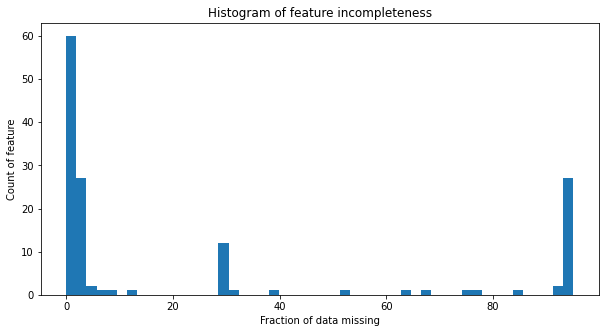

We will drop total of 35 features out of 141
Number of columns considered onto our analysis are 106
List of features with missing more than 50 % are ['hardship_loan_status', 'hardship_reason', 'hardship_status', 'hardship_dpd', 'payment_plan_start_date', 'hardship_type', 'deferral_term', 'hardship_start_date', 'hardship_end_date', 'hardship_length', 'orig_projected_additional_accrued_interest', 'hardship_amount', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'sec_app_revol_util', 'verification_status_joint', 'revol_bal_joint', 'sec_app_open_acc', 'sec_app_earliest_cr_line', 'sec_app_mort_acc', 'sec_app_inq_last_6mths', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_num_rev_accts', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'sec_app_open_act_il', 'dti_joint', 'annual_inc_joint', 'mths_since_last_record', 'mths_since_recent_bc_dlq', 'mths_since_last_major_derog', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'mths_sinc

In [25]:
def plot_missing_features_histogram(missing_features,bin=50):
  '''
  This function will plot histogram of all the missing values.
  It takes two parameters.
  missing_features: List of all the missing variables
  bins: no of bins used to plot the histogram
  '''
  plt.figure(figsize=(10,5))
  missing_features.plot.hist(bins=bin) 
  plt.title("Histogram of feature incompleteness")
  plt.xlabel("Fraction of data missing")
  plt.ylabel("Count of feature")
  plt.show()

def find_features_with_more_than_x_percent_data(percent):
  '''
  This function will return list of all the missing values which are above threshold.
  It will take input of one parameter which will be percentage or threshold for the missing features
  '''
  missing_features = (df.isnull().sum() / len(df)*100).sort_values(ascending=False)
  print("Missing Features",missing_features)
  
  plot_missing_features_histogram(missing_features)

  features_with_more_than_x_percent_data = list(missing_features[missing_features > percent].index)
  print("We will drop total of",len(features_with_more_than_x_percent_data), "features out of",df.shape[1])
  print("Number of columns considered onto our analysis are",(df.shape[1] - len(features_with_more_than_x_percent_data)))
  print("List of features with missing more than",percent,"% are",features_with_more_than_x_percent_data)

  return features_with_more_than_x_percent_data
features_with_more_than_x_percent_data = find_features_with_more_than_x_percent_data(50)


#### Find features with only one unique value

In [26]:
def find_featues_with_one_unique_value():
  '''
  This function will return all the features who contains only one value.
  These functions does not make any impact on data modeling
  '''
  feature_unique_count = 0
  features_list = list()
  print("Count of unique values of each features are")
  for column in df.columns:
    print(column, ":",end="")
    feature_unique_count = df[column].nunique()
    print(feature_unique_count)
    if feature_unique_count == 1:
      features_list.append(column)
  return features_list

features_list = find_featues_with_one_unique_value()
print("The features containing only one unique value are",features_list)
   

Count of unique values of each features are
id :2925493
loan_amnt :1572
funded_amnt :1572
funded_amnt_inv :10062
term :2
int_rate :704
installment :99098
grade :7
sub_grade :35
emp_title :590413
emp_length :11
home_ownership :6
annual_inc :104484
verification_status :3
issue_d :160
loan_status :10
pymnt_plan :1
url :2925492
purpose :14
title :63155
zip_code :962
addr_state :51
dti :13221
delinq_2yrs :37
earliest_cr_line :777
fico_range_low :48
fico_range_high :48
inq_last_6mths :28
mths_since_last_delinq :181
mths_since_last_record :129
open_acc :94
pub_rec :43
revol_bal :113334
revol_util :1443
total_acc :157
initial_list_status :2
out_prncp :532596
out_prncp_inv :539738
total_pymnt :2067940
total_pymnt_inv :1571880
total_rec_prncp :632395
total_rec_int :727968
total_rec_late_fee :22976
recoveries :175479
collection_recovery_fee :197156
last_pymnt_d :157
last_pymnt_amnt :861597
next_pymnt_d :111
last_credit_pull_d :159
last_fico_range_high :72
last_fico_range_low :71
collections_12_mt

In [27]:
features_to_be_dropped = unwanted_features + features_with_more_than_x_percent_data + features_list
features_to_be_dropped

['id',
 'url',
 'hardship_loan_status',
 'hardship_reason',
 'hardship_status',
 'hardship_dpd',
 'payment_plan_start_date',
 'hardship_type',
 'deferral_term',
 'hardship_start_date',
 'hardship_end_date',
 'hardship_length',
 'orig_projected_additional_accrued_interest',
 'hardship_amount',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount',
 'sec_app_revol_util',
 'verification_status_joint',
 'revol_bal_joint',
 'sec_app_open_acc',
 'sec_app_earliest_cr_line',
 'sec_app_mort_acc',
 'sec_app_inq_last_6mths',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_num_rev_accts',
 'sec_app_fico_range_high',
 'sec_app_fico_range_low',
 'sec_app_open_act_il',
 'dti_joint',
 'annual_inc_joint',
 'mths_since_last_record',
 'mths_since_recent_bc_dlq',
 'mths_since_last_major_derog',
 'mths_since_recent_revol_delinq',
 'next_pymnt_d',
 'mths_since_last_delinq',
 'pymnt_plan',
 'policy_code']

#### Explore categorical features

In [28]:
def find_categorical_features():
  '''
  This function will return the list of all the categorical features from our dataset.
  It will not consider the features to be dropped
  '''
  categorical_features = [feature for feature in df.columns if ((df[feature].dtype=='O') & (feature not in features_to_be_dropped))]
  return categorical_features

categorical_features  = find_categorical_features()
print(categorical_features)


['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type', 'hardship_flag', 'debt_settlement_flag']


In [29]:
def get_basic_info_categorical_features(categorical_features):
  '''
  This function will return all the unique value and count of unique values of categorical variables.
  '''
  for feature in categorical_features:
    print("Feature name:",feature)
    print("No of unique values",len(df[feature].unique()))
    print("Unique values",df[feature].unique())
    print("Null values",df[feature].isnull().sum())
    print("-"*100)

get_basic_info_categorical_features(categorical_features)

Feature name: term
No of unique values 3
Unique values [' 36 months' ' 60 months' nan]
Null values 1
----------------------------------------------------------------------------------------------------
Feature name: int_rate
No of unique values 705
Unique values [' 10.65%' ' 15.27%' ' 15.96%' ' 13.49%' ' 12.69%' '  7.90%' ' 18.64%'
 ' 21.28%' ' 14.65%' '  9.91%' ' 16.29%' '  6.03%' ' 11.71%' ' 12.42%'
 ' 14.27%' ' 16.77%' '  7.51%' '  8.90%' ' 18.25%' '  6.62%' ' 19.91%'
 ' 17.27%' ' 17.58%' ' 21.67%' ' 19.42%' ' 22.06%' ' 20.89%' ' 20.30%'
 ' 23.91%' ' 19.03%' ' 23.52%' ' 23.13%' ' 22.74%' ' 22.35%' ' 24.11%'
 '  6.00%' ' 22.11%' '  7.49%' ' 11.99%' '  5.99%' ' 10.99%' '  9.99%'
 ' 18.79%' ' 11.49%' '  8.49%' ' 15.99%' ' 16.49%' '  6.99%' ' 12.99%'
 ' 15.23%' ' 14.79%' '  5.42%' ' 10.59%' ' 17.49%' ' 15.62%' ' 21.36%'
 ' 19.29%' ' 13.99%' ' 18.39%' ' 16.89%' ' 17.99%' ' 20.62%' ' 20.99%'
 ' 22.85%' ' 19.69%' ' 20.25%' ' 23.22%' ' 21.74%' ' 22.48%' ' 23.59%'
 ' 12.62%' ' 18.07%' ' 11.6

Analysis

---
loan_status: Loan status field can be used as target/ dependent variable. We can do prediction of loan status based on dependent variables from our features in scope.<br>

The feature <b>loan_status</b> contains various statuses of the loan application. For our analysis we will consider Fully paid and charged off/defaulted loan applications only.

The feature <b>application type</b> contains 2 unique values named Indivisual and Joint app. This features mainly divides loan applications into two types. We must consider this into our analysis.

Most of these categorical features can be converted into numerical features while performing feature engineering.

### Considering above points, lets do analysis on fully paid and charged/default loans only.

In [30]:
df.loan_status.value_counts()

Fully Paid                                             1497783
Current                                                1031016
Charged Off                                             362548
Late (31-120 days)                                       16154
In Grace Period                                          10028
Late (16-30 days)                                         2719
Issued                                                    2062
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                    433
Name: loan_status, dtype: int64

Analysis

---


*   As we can see there are approximately 10 lakh current loans. We don't know the output of these loans yet. So we will not consider them into our analysis.
*   All the loan statuses will be classifed into 2 classes. one class is to map all the fully paid loans and other class is to maintain charged off, defaulted (remaining) loans.


In [31]:
# Create a method to drop all the records with loan status as Current. 

def drop_loans_based_on_the_status(loan_status):

  Loan_Main = df[~df['loan_status'].isin(loan_status)]
  return Loan_Main

loan_status_to_be_dropped = ['Current']
loan_data = drop_loans_based_on_the_status(loan_status_to_be_dropped)

In [32]:
del df

In [33]:
loan_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,NaN,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,NaN,Oct-2016,499.0,0.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2

In [34]:
loan_data.shape

(1894477, 141)

In [35]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894477 entries, 0 to 105450
Columns: 141 entries, id to debt_settlement_flag
dtypes: float64(106), object(35)
memory usage: 2.0+ GB


Analysis


---
All the loan accounts with status 'Current' are removed from the database.


#### Create two dataframes based on loan application type

The main reason behind dividing the data in this manner is that the features that were associated with secondary applicant were empty for indivisual loans, which might get deleted during data cleaning process. Now with those two subsets of loan some more features were looked into the dataset.

In [36]:
# Commenting this for now. We will create new dataframe when it is required.
# Indivisual_loan = loan_data[loan_data.application_type == 'Individual']
# Joint_loan = loan_data[loan_data.application_type == 'Joint App']

In [37]:
# Indivisual_loan.head()

In [38]:
# Joint_loan.head()

In [39]:
# Indivisual_loan.shape, Joint_loan.shape

In [40]:
# print("We have",Indivisual_loan.shape[0],"indivisual loan accounts and", Joint_loan.shape[0]," joint loan accounts")

Analysis


---
After dataset split, we came to know that We have  1820411 indivisual loan accounts and 74065  joint loan accounts.


In [41]:
# delete unnecessary dataframes for RAM optimization
# del Indivisual_loan
# del Joint_loan

### Let's analyze the indivisual loan accounts

# *4.* Exploratory Data Analysis - Indivisual Loan

In [42]:
df = loan_data[loan_data.application_type == 'Individual']
del loan_data  # delete to free up the RAM

In [43]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,NaN,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,NaN,Oct-2016,499.0,0.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2

In [44]:
df.shape

(1820411, 141)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820411 entries, 0 to 105450
Columns: 141 entries, id to debt_settlement_flag
dtypes: float64(106), object(35)
memory usage: 1.9+ GB


As we can see, there are total 141 features into our dataset. Lets check the features which are <br>

1.   Unwanted
2.   With only one value
3.   With more than X% missing data (No of percentage can be determined after checking the data)


We can drop all the features which are following any of the criteria.

#### 4.1 Find unwanted columns

In [46]:
features_to_be_dropped = list()

In [47]:
unwanted_features = ['id','url']
unwanted_features

['id', 'url']

In [48]:
features_to_be_dropped.extend(unwanted_features)

In [49]:
features_to_be_dropped

['id', 'url']

Analysis:

---

*   All the values in ID column are unique.
*   The ID is not useful in data modeling, either as a categorical valuable or as a numeical variable.
* It does not have any significance except administrative. So we can drop this feature.
*   URL column also have administrative significance only. So we can drop this feature as well.
It is difficult to directly understand if any other independent variable is useful or not. Let's check other methods to find the unwanted columns. We can revisit on this in future once we get to know the clear understanding of the data.




#### 4.2 Find leak columns

In machine learning prediction, the model might latch onto the scent of the of the features and amplify few signals to the max, giving us the representation of the result. In our case, few features were recorded after the loan commenccement. Such features are not available to the user in reality when he is making prediction of the default. Thus, these features must be eleminated and and must not be included as part of prediction model.

In [50]:
leak_cols = ['acc_now_delinq', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 
             'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 
             'funded_amnt', 'funded_amnt_inv', 'hardship_flag', 'inq_last_6mths', 'last_credit_pull_d', 
             'initial_list_status', 'mo_sin_old_rev_tl_op', 'mo_sin_old_il_acct','last_pymnt_amnt', 'last_pymnt_d', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 
             'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 
             'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 
             'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',  
             'out_prncp', 'out_prncp_inv', 'pct_tl_nvr_dlq',     'percent_bc_gt_75', 'pymnt_plan', 'recoveries', 
             'tax_liens', 'tot_coll_amt', 'tot_cur_bal', 'last_fico_range_high','last_fico_range_low','title','addr_state',
             'tot_hi_cred_lim','total_bal_ex_mort', 'total_bc_limit', 
             'total_il_high_credit_limit', 'total_pymnt', 'total_pymnt_inv', 
             'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 
             'total_rev_hi_lim']

In [51]:
features_to_be_dropped.extend(leak_cols)
features_to_be_dropped

['id',
 'url',
 'acc_now_delinq',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'debt_settlement_flag',
 'delinq_2yrs',
 'delinq_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'hardship_flag',
 'inq_last_6mths',
 'last_credit_pull_d',
 'initial_list_status',
 'mo_sin_old_rev_tl_op',
 'mo_sin_old_il_acct',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mths_since_recent_bc',
 'mths_since_recent_inq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'out_prncp',
 'out_prncp_inv',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'pymnt_plan',
 'recoveries',
 'tax_liens',
 'tot_coll_amt',
 'tot_cur_bal',
 'last_fico_range_high',
 'last_f

#### 4.3 Find missing and duplicate values

Missing Features sec_app_revol_util                            100.000000
sec_app_open_act_il                           100.000000
sec_app_open_acc                              100.000000
sec_app_mort_acc                              100.000000
sec_app_inq_last_6mths                        100.000000
sec_app_num_rev_accts                         100.000000
sec_app_chargeoff_within_12_mths              100.000000
annual_inc_joint                              100.000000
dti_joint                                     100.000000
sec_app_earliest_cr_line                      100.000000
sec_app_collections_12_mths_ex_med            100.000000
verification_status_joint                     100.000000
sec_app_fico_range_high                       100.000000
sec_app_fico_range_low                        100.000000
revol_bal_joint                               100.000000
hardship_loan_status                           99.148874
hardship_status                                99.146072
hardship_type 

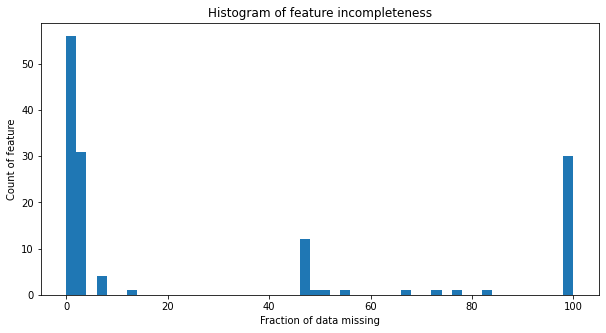

We will drop total of 36 features out of 141
Number of columns considered onto our analysis are 105
List of features with missing more than 50 % are ['sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_open_acc', 'sec_app_mort_acc', 'sec_app_inq_last_6mths', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'annual_inc_joint', 'dti_joint', 'sec_app_earliest_cr_line', 'sec_app_collections_12_mths_ex_med', 'verification_status_joint', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'revol_bal_joint', 'hardship_loan_status', 'hardship_status', 'hardship_type', 'deferral_term', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_reason', 'orig_projected_additional_accrued_interest', 'next_pymnt_d', 'hardship_amount', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'mths_since_last_record', 'mths_since_recent_bc_dlq', 'mths_since_last_major_derog', 'mths_since_recent_revol_delinq', 'il_util',

['sec_app_revol_util',
 'sec_app_open_act_il',
 'sec_app_open_acc',
 'sec_app_mort_acc',
 'sec_app_inq_last_6mths',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'annual_inc_joint',
 'dti_joint',
 'sec_app_earliest_cr_line',
 'sec_app_collections_12_mths_ex_med',
 'verification_status_joint',
 'sec_app_fico_range_high',
 'sec_app_fico_range_low',
 'revol_bal_joint',
 'hardship_loan_status',
 'hardship_status',
 'hardship_type',
 'deferral_term',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_length',
 'hardship_dpd',
 'hardship_reason',
 'orig_projected_additional_accrued_interest',
 'next_pymnt_d',
 'hardship_amount',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount',
 'mths_since_last_record',
 'mths_since_recent_bc_dlq',
 'mths_since_last_major_derog',
 'mths_since_recent_revol_delinq',
 'il_util',
 'mths_since_last_delinq']

In [52]:
features_with_more_than_x_percent_data = find_features_with_more_than_x_percent_data(50)
features_with_more_than_x_percent_data

In [53]:
for feature in features_with_more_than_x_percent_data:
  if feature not in features_to_be_dropped:
    features_to_be_dropped.append(feature)

features_to_be_dropped

['id',
 'url',
 'acc_now_delinq',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'debt_settlement_flag',
 'delinq_2yrs',
 'delinq_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'hardship_flag',
 'inq_last_6mths',
 'last_credit_pull_d',
 'initial_list_status',
 'mo_sin_old_rev_tl_op',
 'mo_sin_old_il_acct',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mths_since_recent_bc',
 'mths_since_recent_inq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'out_prncp',
 'out_prncp_inv',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'pymnt_plan',
 'recoveries',
 'tax_liens',
 'tot_coll_amt',
 'tot_cur_bal',
 'last_fico_range_high',
 'last_f

Analysis

---

As per out initial analysis, there are lot of features with missing data. For now, we are considering threshold of 50% for missing data. Hence, any feature with missing data more than 50% will be dropped from our analysis.


One thing to notice here is that some features have missing data of 100%. We will check if this data is present based on some conditions. If such scenario exists then we will handle this into our anlaysis


#### 4.4 Find features with only one unique value

In [54]:
features_list = find_featues_with_one_unique_value()
print("The features containing only one unique value are",features_list)

Count of unique values of each features are
id :1820411
loan_amnt :1572
funded_amnt :1572
funded_amnt_inv :10058
term :2
int_rate :702
installment :89717
grade :7
sub_grade :35
emp_title :452198
emp_length :11
home_ownership :6
annual_inc :77625
verification_status :3
issue_d :160
loan_status :9
pymnt_plan :1
url :1820411
purpose :14
title :63155
zip_code :949
addr_state :51
dti :4870
delinq_2yrs :35
earliest_cr_line :767
fico_range_low :48
fico_range_high :48
inq_last_6mths :28
mths_since_last_delinq :172
mths_since_last_record :128
open_acc :86
pub_rec :42
revol_bal :93838
revol_util :1409
total_acc :150
initial_list_status :2
out_prncp :24210
out_prncp_inv :24260
total_pymnt :1678059
total_pymnt_inv :1286214
total_rec_prncp :275566
total_rec_int :610316
total_rec_late_fee :21097
recoveries :169612
collection_recovery_fee :190402
last_pymnt_d :155
last_pymnt_amnt :822948
next_pymnt_d :108
last_credit_pull_d :159
last_fico_range_high :72
last_fico_range_low :71
collections_12_mths_ex_

In [55]:
for feature in features_list:
  if feature not in features_to_be_dropped:
    features_to_be_dropped.append(feature)

sorted(features_to_be_dropped)

['acc_now_delinq',
 'acc_open_past_24mths',
 'addr_state',
 'annual_inc_joint',
 'application_type',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'debt_settlement_flag',
 'deferral_term',
 'delinq_2yrs',
 'delinq_amnt',
 'dti_joint',
 'funded_amnt',
 'funded_amnt_inv',
 'hardship_amount',
 'hardship_dpd',
 'hardship_end_date',
 'hardship_flag',
 'hardship_last_payment_amount',
 'hardship_length',
 'hardship_loan_status',
 'hardship_payoff_balance_amount',
 'hardship_reason',
 'hardship_start_date',
 'hardship_status',
 'hardship_type',
 'id',
 'il_util',
 'initial_list_status',
 'inq_last_6mths',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'mths_since_rece

Analysis


---

Features "pymnt_plan" ,"Application_type' and "policy_code" contains only one unique value for entire dataset. This featues will not provide any significant value to the model.

In [56]:
features_to_be_dropped

['id',
 'url',
 'acc_now_delinq',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'debt_settlement_flag',
 'delinq_2yrs',
 'delinq_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'hardship_flag',
 'inq_last_6mths',
 'last_credit_pull_d',
 'initial_list_status',
 'mo_sin_old_rev_tl_op',
 'mo_sin_old_il_acct',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mths_since_recent_bc',
 'mths_since_recent_inq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'out_prncp',
 'out_prncp_inv',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'pymnt_plan',
 'recoveries',
 'tax_liens',
 'tot_coll_amt',
 'tot_cur_bal',
 'last_fico_range_high',
 'last_f

In [57]:
len(features_to_be_dropped)

102

#### Data cleaning: Drop all the unncessary columns

In [58]:
df.drop(columns=features_to_be_dropped,inplace=True)

In [59]:
df.shape

(1820411, 39)

#### 4.5 Explore target variable

In [60]:
df.loan_status.value_counts()

Fully Paid                                             1445399
Charged Off                                             345439
Late (31-120 days)                                       14008
In Grace Period                                           8254
Late (16-30 days)                                         2338
Does not meet the credit policy. Status:Fully Paid        1988
Issued                                                    1833
Does not meet the credit policy. Status:Charged Off        761
Default                                                    391
Name: loan_status, dtype: int64

###### Plot target/ dependent variables

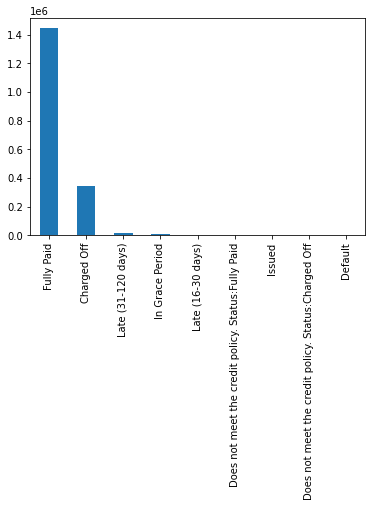

In [61]:
df.loan_status.value_counts().plot(kind='bar')

Analysis

---

* As we can see, we have lot of loan accounts with status fully paid and charged off. May be we can try to categorize or group all the data as charged off except fully paid.
* Our dataset is very imbalanced. During our machine learning modeling, we need to handle this.

###### Find the disribution of the loan status


In [62]:

print(df.loan_status.value_counts())
print("-"*65)
print(df.loan_status.value_counts(normalize=True))

Fully Paid                                             1445399
Charged Off                                             345439
Late (31-120 days)                                       14008
In Grace Period                                           8254
Late (16-30 days)                                         2338
Does not meet the credit policy. Status:Fully Paid        1988
Issued                                                    1833
Does not meet the credit policy. Status:Charged Off        761
Default                                                    391
Name: loan_status, dtype: int64
-----------------------------------------------------------------
Fully Paid                                             0.793996
Charged Off                                            0.189759
Late (31-120 days)                                     0.007695
In Grace Period                                        0.004534
Late (16-30 days)                                      0.001284
Does not meet t

###### Plot countplot of the loan status

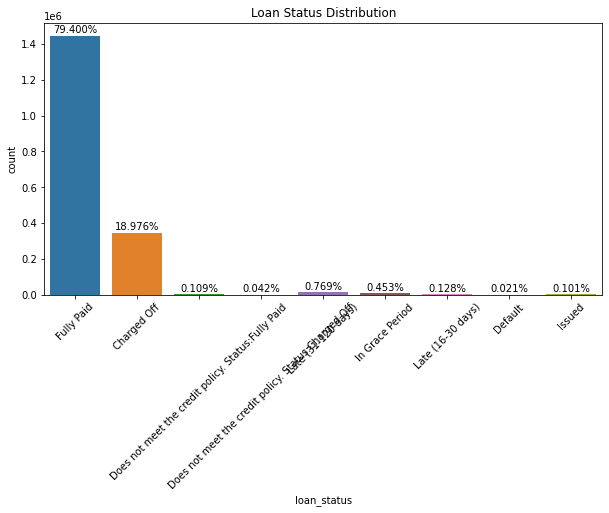

In [63]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='loan_status',data=df)
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.3f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.title('Loan Status Distribution')
plt.xticks(rotation=45)
plt.show()

Note: We will perform target variable analysis with independent variable later on.

#### 4.6 Explore Categorical variables

In [64]:
categorical_features  = find_categorical_features()
print(categorical_features)

['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code', 'earliest_cr_line', 'revol_util']


In [65]:
get_basic_info_categorical_features(categorical_features)

Feature name: term
No of unique values 2
Unique values [' 36 months' ' 60 months']
Null values 0
----------------------------------------------------------------------------------------------------
Feature name: int_rate
No of unique values 702
Unique values [' 10.65%' ' 15.27%' ' 15.96%' ' 13.49%' ' 12.69%' '  7.90%' ' 18.64%'
 ' 21.28%' ' 14.65%' '  9.91%' ' 16.29%' '  6.03%' ' 11.71%' ' 12.42%'
 ' 14.27%' ' 16.77%' '  7.51%' '  8.90%' ' 18.25%' '  6.62%' ' 19.91%'
 ' 17.27%' ' 17.58%' ' 21.67%' ' 19.42%' ' 22.06%' ' 20.89%' ' 20.30%'
 ' 23.91%' ' 19.03%' ' 23.52%' ' 23.13%' ' 22.74%' ' 22.35%' ' 24.11%'
 '  6.00%' ' 22.11%' '  7.49%' ' 11.99%' '  5.99%' ' 10.99%' '  9.99%'
 ' 18.79%' ' 11.49%' '  8.49%' ' 15.99%' ' 16.49%' '  6.99%' ' 12.99%'
 ' 15.23%' ' 14.79%' '  5.42%' ' 10.59%' ' 17.49%' ' 15.62%' ' 21.36%'
 ' 19.29%' ' 13.99%' ' 18.39%' ' 16.89%' ' 17.99%' ' 20.62%' ' 20.99%'
 ' 22.85%' ' 19.69%' ' 20.25%' ' 23.22%' ' 21.74%' ' 22.48%' ' 23.59%'
 ' 12.62%' ' 18.07%' ' 11.63%' 

Analysis

---
Features earliest_cr_line, zip_code, issue_d, int_rate are not categorical variable. We need to convert them to numerical variables. Some features can be treated as discrete numerical variables.


The other categorical features can be converted into numerical features while performing feature engineering.


In [66]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'dti', 'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'open_rv_12m', 'open_rv_24m',
       'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

#### 4.7 Find categorical variables distribution

In [ ]:
# Check count based on categorical features
plt.figure(figsize=(15,80),facecolor='white')
plotnumber = 1 
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

Analysis

---



#### Completed tasks
1. Loan accounts with status 'Current' are dropped.
2. Based on the application type, we wiil maintain indivisual and joint app loans separately.
3. Drop all the unwanted features

#### Tasks to be completed during feature engineering

1. Handle null values of categorical variables.
2. Convert all the categorical variables into numerical variables.
3. Features earliest_cr_line, zip_code, issue_d, int_rate are not categorical variable. We need to convert them to numerical variables. Some features can be treated as discrete numerical variables.
4. The other categorical features can be converted into numerical features while performing feature engineering.
5. Convert or group all the loan statuses as charged off except fully paid loans. 
6. Handle the imbalanced target data
7. We will perform joint loan analysis separately.

